# Application of unsupervised learning

## 1. Presentation of the dataset

We chose the dataset "Beer Reviews from Beer Advocate (1.5 Million)" from Kaggle ([https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate](https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate)). This dataset consist of 1.5 millions beer reviews from *Beer Advocate* ([https://www.beeradvocate.com/](https://www.beeradvocate.com/)).
The dataset contains the following features:
- **brewery_id** : ID of the brewery that made the beer
- **brewery_name** : name of the brewery that made the beer
- **review_time** : date and time of the review
- **review_overall** : reviewer's overall rating of the beer on a scale from 0 to 5
- **review_aroma** : reviewer's rating of the beer's aroma on a scale from 0 to 5
- **review_appearance** : reviewer's rating of the beer's appearance on a scale from 0 to 5
- **review_profilename** : reviewer's username
- **beer_style** : style of the beer (ex: IPA, American Pale Ale, etc.)
- **review_palate** : reviewer's rating of the beer's palate on a scale from 0 to 5 (palate = the feel of the beer in the mouth)
- **review_taste** : reviewer's rating of the beer's taste on a scale from 0 to 5
- **beer_name** : name of the beer
- **beer_abv** : alcohol by volume of the beer

## 2. Problem definition

The problem we are trying to solve is to group beers based on the reviews and the alcohol by volume to make a beer recommender system. By clustering the beers, we aim to identify the beers that are similar to each other and recommend them to the users.

We will use the following features to cluster the beers:
- **beer_abv**
- **review_overall**
- **review_aroma**
- **review_appearance**
- **review_palate**
- **review_taste**

The problem we are solving would be interesting or have a value for an industry because it would allow to recommend beers to the users based on their preferences. This could be used by a beer company or bars to recommend beers to the users based on their preferences and the beers they have already tried.



## 3. Data loading and analysis

### Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# !pip install opendatasets


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
# import opendatasets as od

# od.download(
    "https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate


100%|██████████| 32.5M/32.5M [00:02<00:00, 11.7MB/s]


In [5]:
data = pd.read_csv('../../data/unsupervised learning/beer_reviews.csv')
# data = pd.read_csv('/content/1-5-million-beer-reviews-from-beer-advocate/beer_reviews.csv')
data.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Analysis of the dataset

#### Descriptive statistics

We will start by analyzing the descriptive statistics of the dataset. We will look at the mean, standard deviation, minimum, maximum, and quartiles of the review and abv features in the dataset.

In [10]:
only_reviews_and_abv = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
print(data[only_reviews_and_abv].describe())

       review_overall  review_aroma  review_appearance  review_palate  \
count    1.586614e+06  1.586614e+06       1.586614e+06   1.586614e+06   
mean     3.815581e+00  3.735636e+00       3.841642e+00   3.743701e+00   
std      7.206219e-01  6.976167e-01       6.160928e-01   6.822184e-01   
min      0.000000e+00  1.000000e+00       0.000000e+00   1.000000e+00   
25%      3.500000e+00  3.500000e+00       3.500000e+00   3.500000e+00   
50%      4.000000e+00  4.000000e+00       4.000000e+00   4.000000e+00   
75%      4.500000e+00  4.000000e+00       4.000000e+00   4.000000e+00   
max      5.000000e+00  5.000000e+00       5.000000e+00   5.000000e+00   

       review_taste      beer_abv  
count  1.586614e+06  1.518829e+06  
mean   3.792860e+00  7.042387e+00  
std    7.319696e-01  2.322526e+00  
min    1.000000e+00  1.000000e-02  
25%    3.500000e+00  5.200000e+00  
50%    4.000000e+00  6.500000e+00  
75%    4.500000e+00  8.500000e+00  
max    5.000000e+00  5.770000e+01  


We can analyze the descriptive statistics of the numerical features in the dataset. We can see that the mean overall rating is **3.8**, the mean aroma rating is **3.7**, the mean appearance rating is **3.8**, the mean palate rating is **3.7**, the mean taste rating is **3.8**, and the mean alcohol by volume is **7.0**. The highest alcohol by volume is **57.7%** and the lowest alcohol by volume is **0.0%**.


#### Number of missing values

In [13]:
data.isnull().sum()

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

#### Number of unique values

In [14]:
# number of unique values in the dataset
data.nunique()

index                 1586614
brewery_id               5840
brewery_name             5742
review_time           1577960
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64

The dataset contains **1,543** unique breweries, **104** unique beer styles, and **57,731** unique beers. The dataset contains **33,996** unique reviewers.

#### Distribution of the features

##### Number of beers per style

In [19]:
nb_beers_by_style = data.groupby('beer_style')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_style.head(10))

beer_style
American IPA                      3167
American Pale Ale (APA)           2887
American Amber / Red Ale          2231
American Porter                   1839
Fruit / Vegetable Beer            1604
Euro Pale Lager                   1441
American Double / Imperial IPA    1435
English Bitter                    1418
Hefeweizen                        1404
German Pilsener                   1270
Name: beer_name, dtype: int64


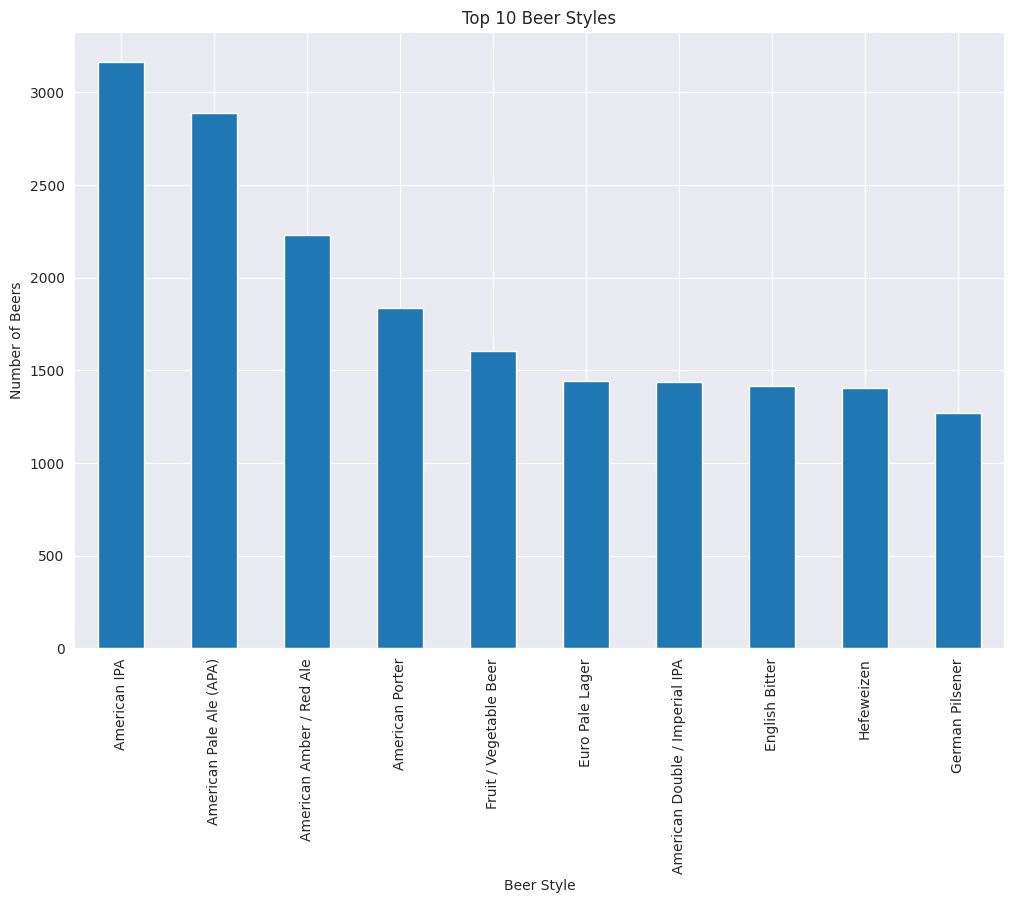

In [20]:
# Plot the top 10 beer styles
plt.figure(figsize=(12, 8))
nb_beers_by_style.head(10).plot(kind='bar')
plt.title('Top 10 Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Number of Beers')

plt.show()

##### Number of beers per brewery

In [23]:
nb_beers_by_brewery= data.groupby('brewery_name')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_brewery.head(10))

brewery_name
Rock Bottom Restaurant & Brewery      868
John Harvard's Brewery & Ale House    394
Goose Island Beer Co.                 368
Iron Hill Brewery & Restaurant        316
Minneapolis Town Hall Brewery         312
Port Brewing Company / Pizza Port     283
Cigar City Brewing                    201
Mikkeller ApS                         185
Kuhnhenn Brewing Company              177
Sly Fox Brewing Company               163
Name: beer_name, dtype: int64


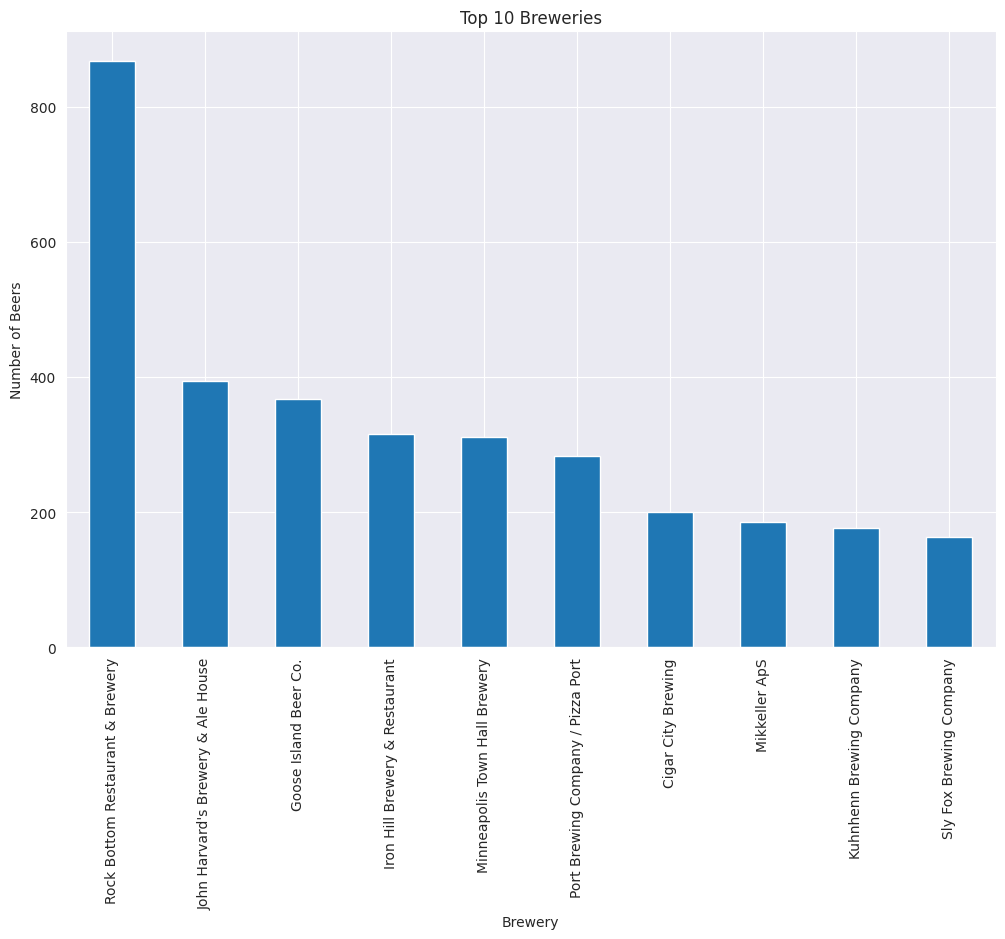

In [24]:
# Plot the top 10 breweries
plt.figure(figsize=(12, 8))
nb_beers_by_brewery.head(10).plot(kind='bar')
plt.title('Top 10 Breweries')
plt.xlabel('Brewery')
plt.ylabel('Number of Beers')
plt.show()

##### Distribution of ratings

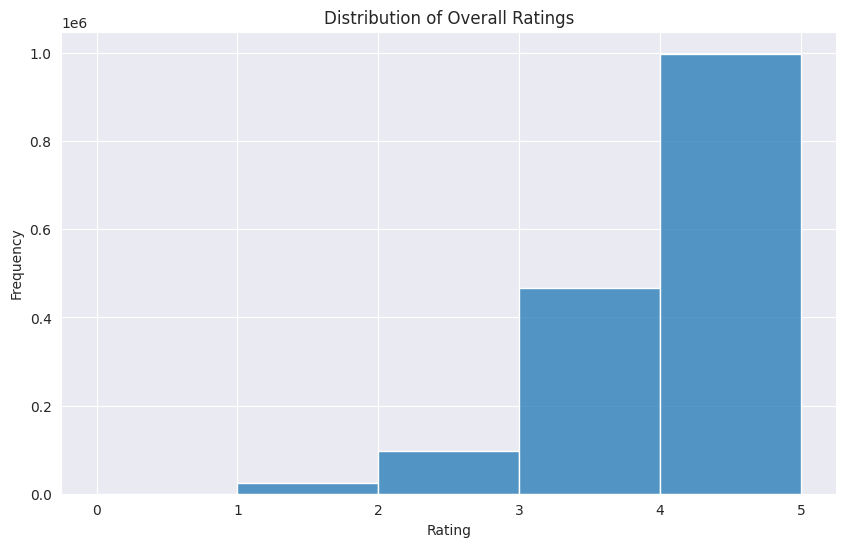

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_overall'], bins=5)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

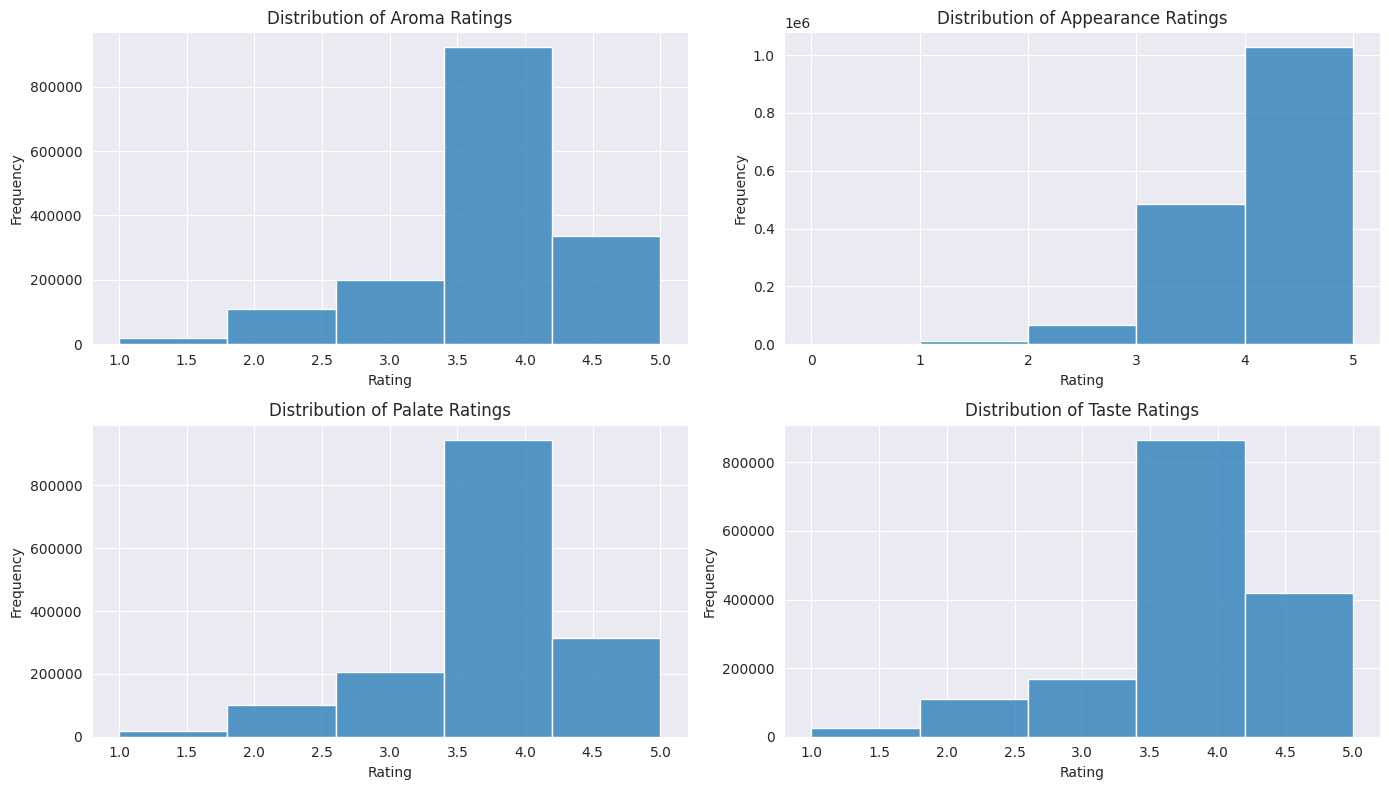

In [30]:
# Add all the other ratings in same window but with different subplots
numerical_columns = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns):
    name = column.split('_')[-1].capitalize()
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], bins=5)
    plt.title(f'Distribution of {name} Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

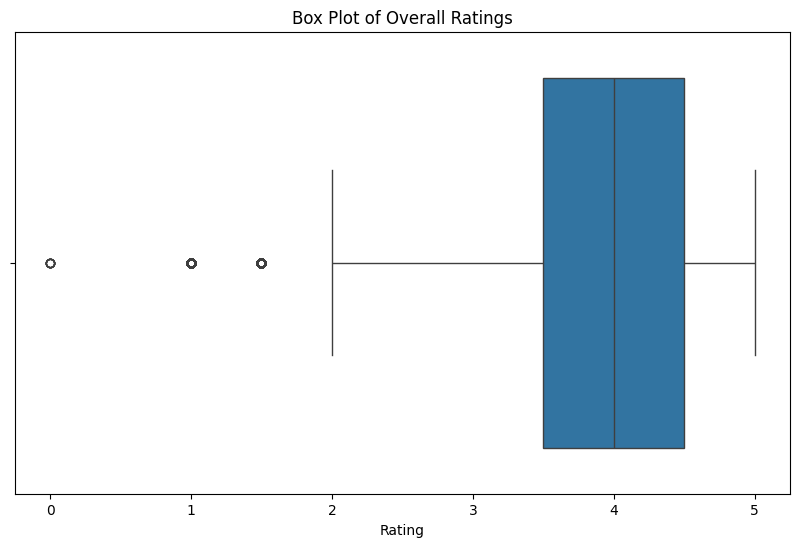

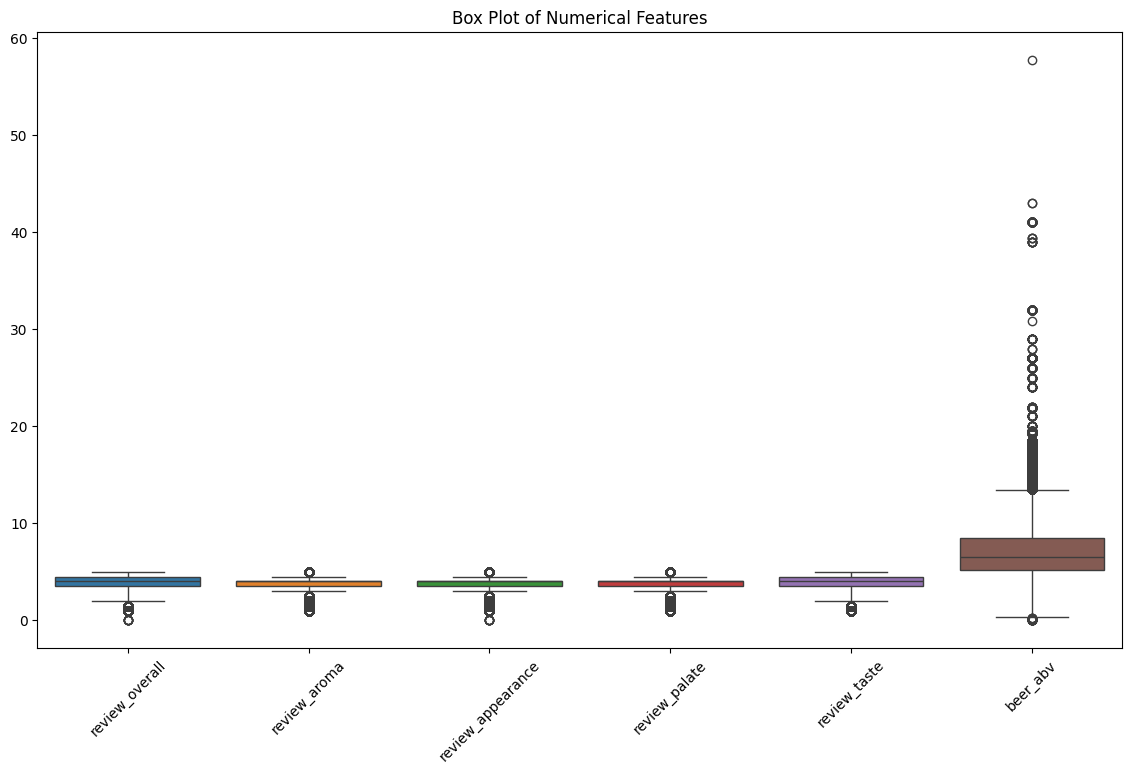

In [30]:
# Box plot to detect outliers in overall ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['review_overall'])
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Rating')
plt.show()

# Box plots to detect outliers in all rating features
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


                   review_overall  review_aroma  review_appearance  \
review_overall           1.000000      0.616013           0.501732   
review_aroma             0.616013      1.000000           0.561029   
review_appearance        0.501732      0.561029           1.000000   
review_palate            0.701914      0.616947           0.566634   
review_taste             0.789816      0.716776           0.546980   
beer_abv                 0.138512      0.332570           0.263941   

                   review_palate  review_taste  beer_abv  
review_overall          0.701914      0.789816  0.138512  
review_aroma            0.616947      0.716776  0.332570  
review_appearance       0.566634      0.546980  0.263941  
review_palate           1.000000      0.734135  0.286711  
review_taste            0.734135      1.000000  0.290827  
beer_abv                0.286711      0.290827  1.000000  


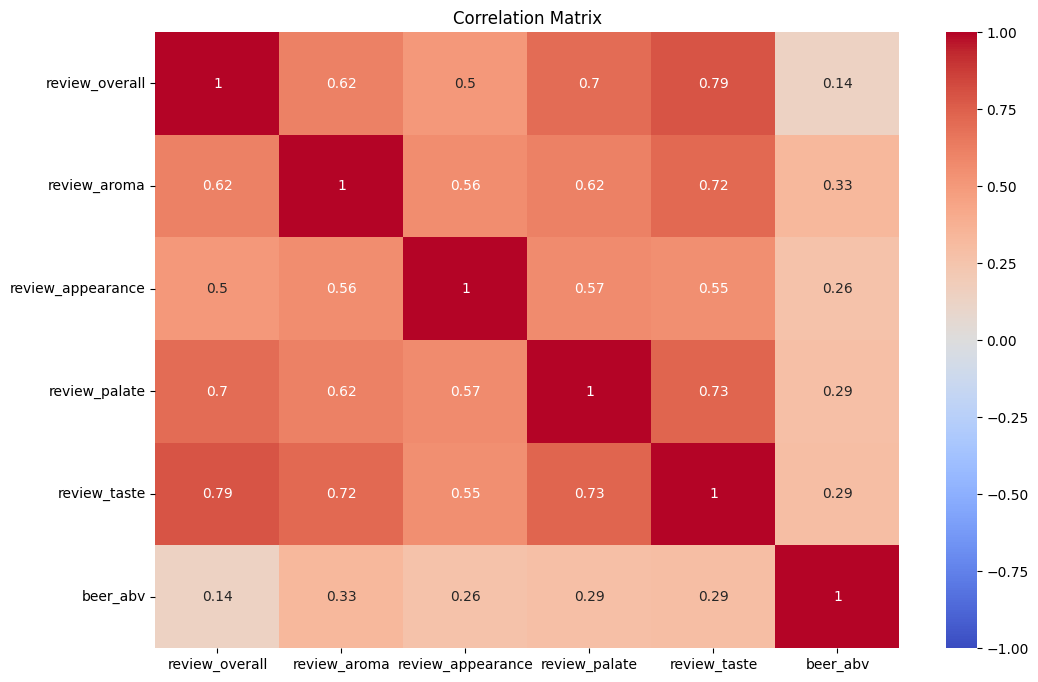

In [32]:
# Correlation matrix
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
Russian Imperial Stout              4.023084
Weizenbock                          4.007969
American Double / Imperial IPA      3.998017
Flanders Red Ale                    3.992722
Rye Beer                            3.981737
Name: review_overall, dtype: float64


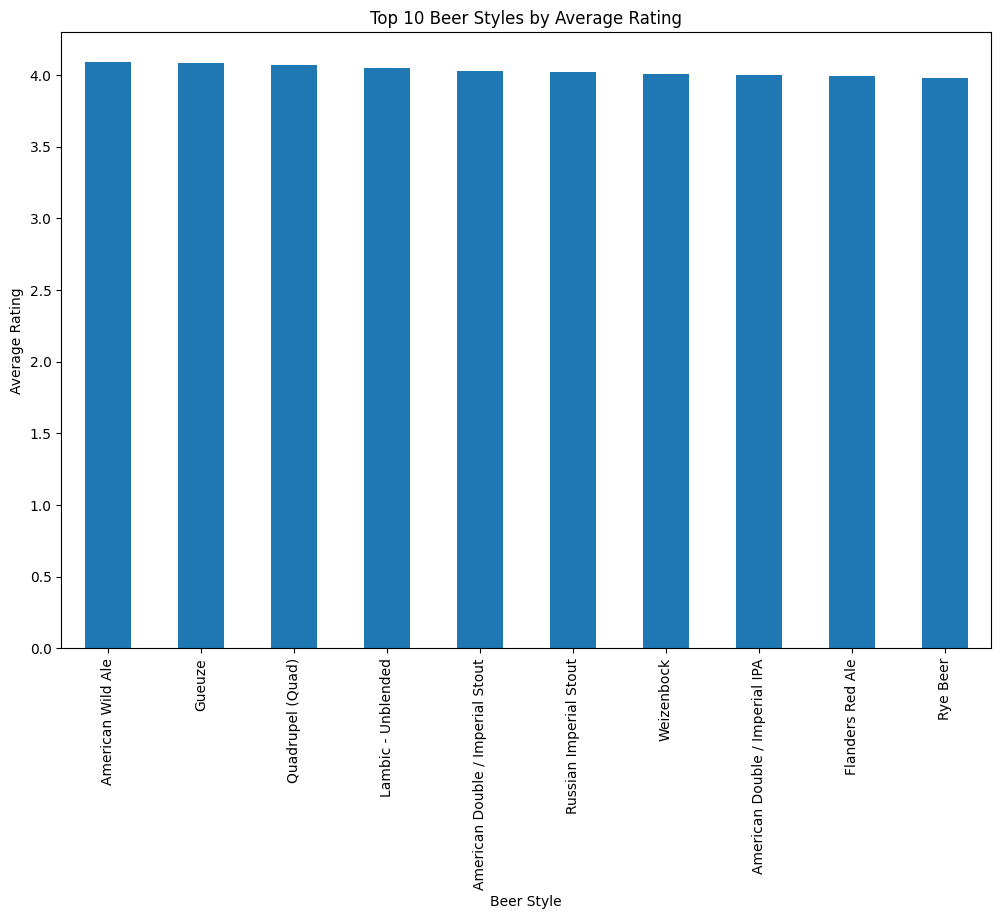

In [34]:
# Average rating by beer style
avg_rating_by_style = data.groupby('beer_style')['review_overall'].mean().sort_values(ascending=False)
print(avg_rating_by_style.head(10))

# Plot average rating by top 10 beer styles
plt.figure(figsize=(12, 8))
avg_rating_by_style.head(10).plot(kind='bar')
plt.title('Top 10 Beer Styles by Average Rating')
plt.xlabel('Beer Style')
plt.ylabel('Average Rating')
plt.show()


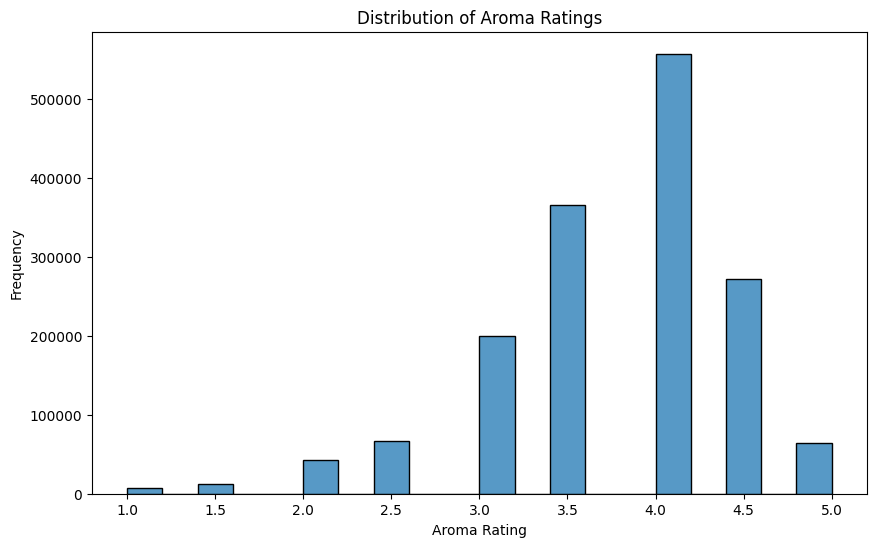

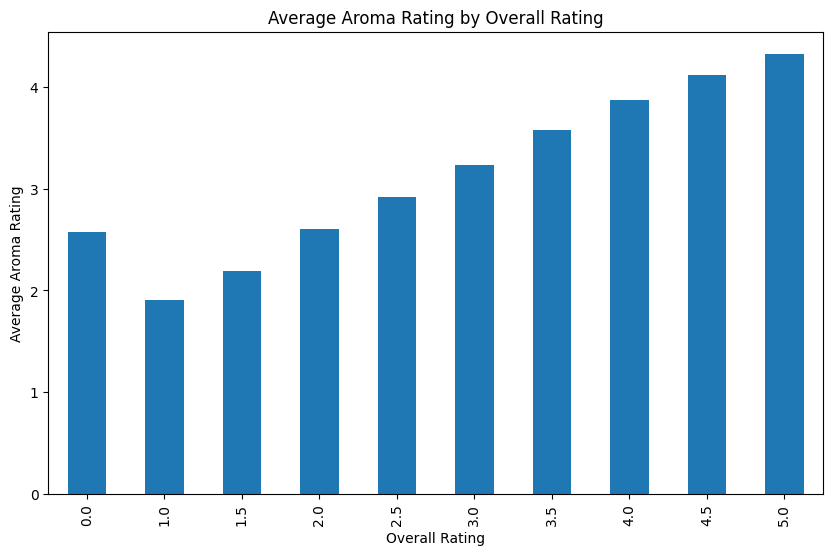

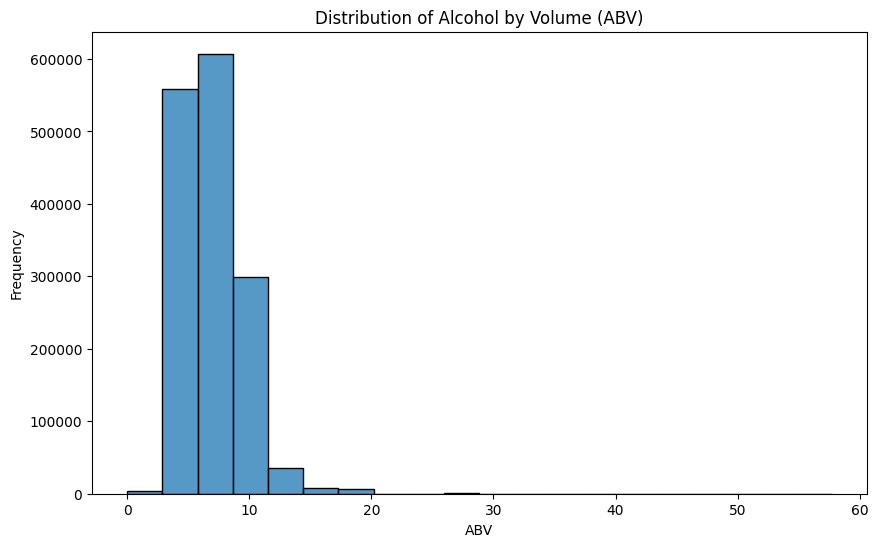

In [37]:
# Distribution of aroma ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['review_aroma'], bins=20)
plt.title('Distribution of Aroma Ratings')
plt.xlabel('Aroma Rating')
plt.ylabel('Frequency')
plt.show()

# Average aroma rating by overall rating
avg_aroma_by_rating = data.groupby('review_overall')['review_aroma'].mean()
plt.figure(figsize=(10, 6))
avg_aroma_by_rating.plot(kind='bar')
plt.title('Average Aroma Rating by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Aroma Rating')
plt.show()

# Distribution of alcohol by volume (ABV)
plt.figure(figsize=(10, 6))
sns.histplot(data['beer_abv'], bins=20)
plt.title('Distribution of Alcohol by Volume (ABV)')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()


## 4. Data preprocessing